# Video Game Sales Analysis for Ice Store

## Introduction
This project involves analyzing historical video game sales data for the online store Ice, which sells games worldwide. The goal of this analysis is to identify patterns and trends that influence a game’s success in order to assist in planning effective advertising campaigns for 2017.

The dataset provided contains information on video games, including:
- Game name
- Platform (e.g., Xbox, PlayStation)
- Year of release
- Genre
- Regional sales (North America, Europe, Japan, and other regions)
- Critic and user reviews
- ESRB ratings

The analysis will focus on understanding how various factors, such as platform popularity, sales trends, genre performance, and reviews, affect a game’s success. The findings will provide insights into the most profitable platforms and genres, helping the store allocate resources for marketing more efficiently.

## Project Outline

### Step 1: Data Loading and Initial Inspection
- Load the dataset.
- Display the general structure of the data and its main characteristics.
  
### Step 2: Data Cleaning and Preparation
- Rename columns to make them lowercase for easier handling.
- Convert columns to appropriate data types.
- Handle missing values by filling them with relevant statistics (e.g., median scores) or placeholders (e.g., 'Unrated').
- Add a new column to calculate the total sales for each game across all regions.

### Step 3: Exploratory Data Analysis (EDA)
- **Year-wise analysis**: Explore how many games were released over time and assess the significance of the data for each period.
- **Platform performance**: Identify platforms with the highest total sales and analyze how sales have varied by year.
- **Genre analysis**: Investigate which genres are the most profitable and how genre preferences vary between regions.
- **Review analysis**: Explore how user and professional reviews impact sales, using correlation and visual analysis.

### Step 4: Regional User Profiles
- Determine the top five platforms and genres for each region (NA, EU, JP).
- Analyze the influence of ESRB ratings on sales in different regions.

### Step 5: Hypothesis Testing
- **Hypothesis 1**: Test whether the average user ratings of Xbox One and PC platforms are the same.
- **Hypothesis 2**: Test whether the average user ratings for Action and Sports genres are different.

### Step 6: Conclusion
- Summarize key findings and trends observed in the analysis.
- Provide actionable recommendations based on the insights gained from the data.

---


### Step 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('games.csv')
except FileNotFoundError:
    try:
        games = pd.read_csv('/datasets/games.csv')
    except FileNotFoundError:
        print("File not found. Please ensure the file path is correct or upload the file.")


In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Step 2: Data Cleaning

In [4]:
# Proceed with data cleaning:
# Renaming columns to lowercase
games.columns = games.columns.str.lower()

# Check for missing values in the dataset and calculate the percentage for each column
missing_values = games.isnull().sum().to_frame('missing_values')
missing_values['%'] = round(games.isnull().sum() / len(games), 3) * 100  # Convert to percentage format
missing_values.sort_values(by='%', ascending=False, inplace=True)


# Display the columns with missing values
print("Missing Values Analysis:")
missing_values

Missing Values Analysis:


,missing_values,%
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
platform,0,0.0
genre,2,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0


In [5]:
games['name'].fillna('Unknown')
games['genre'].fillna('Unknown')


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: genre, Length: 16715, dtype: object

In [6]:
# median_year = games['year_of_release'].median()
games['year_of_release'] = games['year_of_release'].fillna(0)


In [7]:
# Convert 'user_score' to numeric, forcing errors to NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Fill missing values with the median
median_user_score = games['user_score'].median()
games['user_score'].fillna(median_user_score)


0        8.0
1        7.5
2        8.3
3        8.0
4        7.5
        ... 
16710    7.5
16711    7.5
16712    7.5
16713    7.5
16714    7.5
Name: user_score, Length: 16715, dtype: float64

### Rationale for Using the Median to Fill Missing Values

- **Year of Release**: The median is used to fill missing values because it reflects a central release period without being skewed by years with unusually high or low numbers of releases.
  
- **User Score**: The median is less affected by extreme scores, capturing typical user sentiment without bias from outliers. This ensures that missing values don’t distort the analysis.


In [8]:
# Fill missing values in 'critic_score' with the zero
games['critic_score'] = games['critic_score'].fillna(0)


# Fill missing values in 'rating' with 'Unrated'
games['rating'] = games['rating'].fillna('Unrated')


In [9]:
# Calculate total sales by summing sales across all regions
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display the updated DataFrame with the new 'total_sales' column
games.head()

games = games[games['year_of_release'] != 0]

# Filter out that one game
# conditions: <not> platform == "DS", year of release > 0, year of release < 2004
games = games[
    ~((games['platform'] == 'DS') &
    (games['year_of_release'] > 0) &
    (games['year_of_release'] < 2004))
]
games[games['platform'] == 'DS']['year_of_release'].sort_values()


4421     2004.0
13095    2004.0
11517    2004.0
6580     2004.0
14161    2004.0
          ...  
9753     2013.0
14353    2013.0
7460     2013.0
14716    2013.0
5054     2013.0
Name: year_of_release, Length: 2120, dtype: float64

### EDA

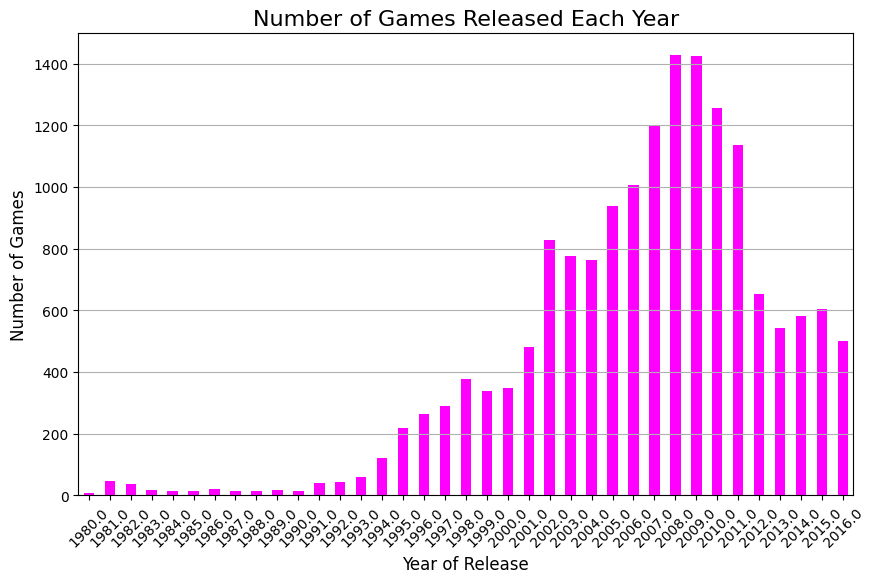

In [10]:
# Count the number of games released each year
games_per_year = games.groupby('year_of_release')['name'].count()

# Plot the number of games released each year
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='magenta')
plt.title('Number of Games Released Each Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [11]:
# Group by platform and calculate total sales for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display the result
platform_sales.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

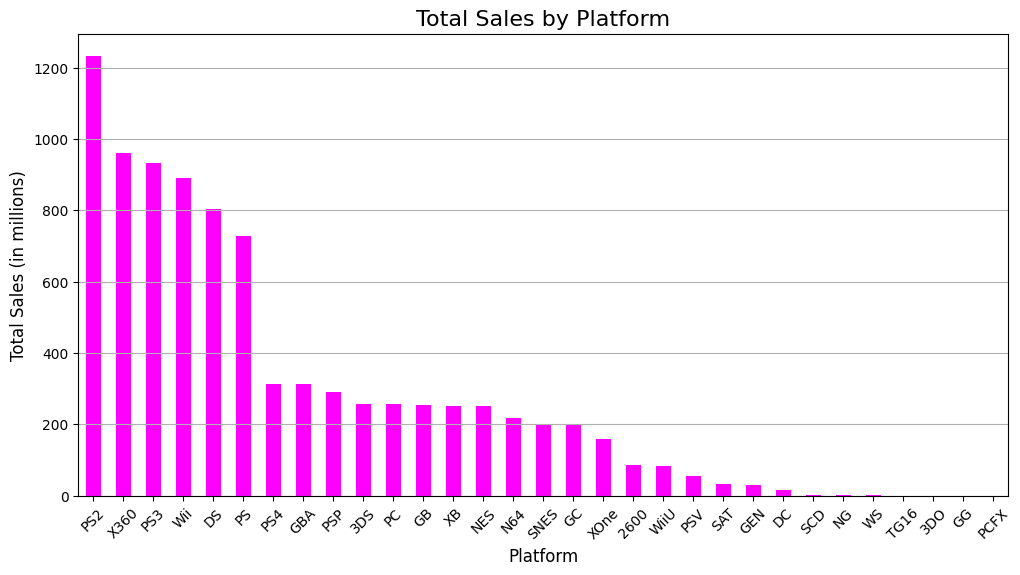

In [12]:
# Plot total sales per platform
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='magenta')
plt.title('Total Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [13]:
# Group by platform and year_of_release, summing total sales
platform_sales_yearly = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().fillna(0)

# Display the result
platform_sales_yearly.head()


year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00


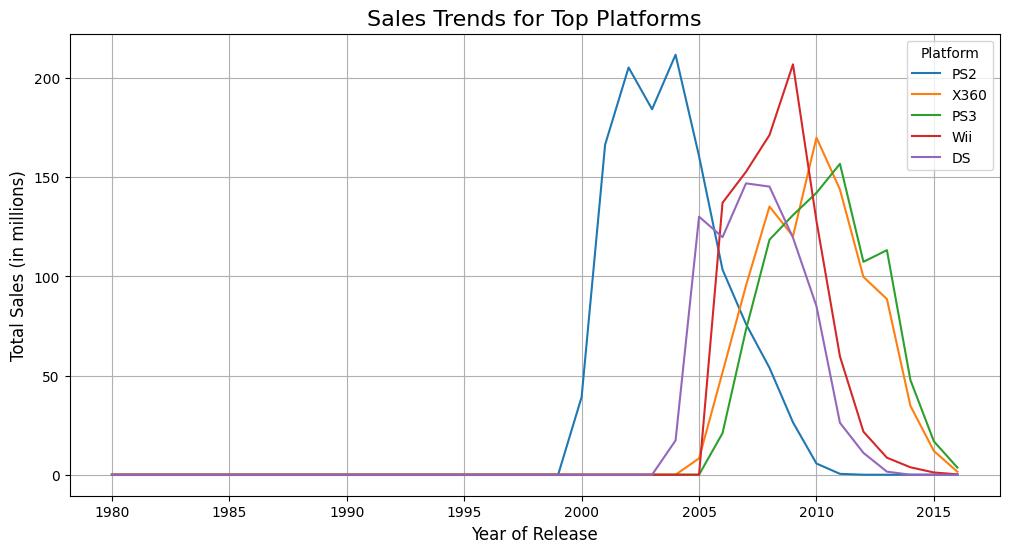

In [14]:
# Plot sales trends over time for the top platforms
top_platforms = platform_sales.index[:5]  # Top 5 platforms by total sales

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    
    plt.plot(platform_sales_yearly.loc[platform], label=platform)

plt.title('Sales Trends for Top Platforms', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)
plt.legend(title="Platform")
plt.grid()
plt.show()



### Student comment:
I tried to get rid of that one DS outlier out but I was unable to, may I get some help on that please.

# Step 3: Analyze the data

Filter for a set of data that is a span of 5 years... recommended 4-5 years before 2017

In [15]:
# Filter the dataset for games released between 2012 and 2016

games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Display the filtered DataFrame to check the result
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,NaN,Unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,0.0,NaN,Unrated,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [16]:
# Count the number of games released each year from 2012 to 2016
games_per_year =games.groupby('year_of_release')['name'].count()

# Display the count to check data significance
games_per_year


year_of_release
2012.0    653
2013.0    544
2014.0    581
2015.0    606
2016.0    502
Name: name, dtype: int64

In [17]:
# Calculate total sales for each platform from 2012 to 2016
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display top platforms by total sales
print("Top Platforms by Total Sales (2012-2016):")
platform_sales.head()

Top Platforms by Total Sales (2012-2016):


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

In [18]:
# Select the top platforms for analysis
top_platforms = platform_sales.index[:5]  # Adjust the number as needed

# Group by platform and year_of_release, then calculate yearly sales for each top platform
platform_sales_yearly = games[games['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().fillna(0)

# Display the yearly distribution of sales for top platforms
print("Yearly Sales Distribution for Top Platforms:")
platform_sales_yearly

Yearly Sales Distribution for Top Platforms:


year_of_release,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
X360,99.74,88.58,34.74,11.96,1.52
XOne,0.00,18.96,54.07,60.14,26.15


In [19]:
# Calculate sales difference between 2012 and 2016 for each platform
growth_trends = platform_sales_yearly[2016] - platform_sales_yearly[2012]

# Display platforms with positive or negative growth
print("Platform Growth Trends (2012-2016):")
growth_trends


Platform Growth Trends (2012-2016):


platform
3DS     -36.22
PS3    -103.76
PS4      69.25
X360    -98.22
XOne     26.15
dtype: float64

In [20]:
# Filter for platforms with high total sales and positive/stable growth
profitable_platforms = growth_trends[growth_trends >= 0].index  # Adjust threshold as needed
print("Selected Profitable Platforms for Marketing in 2017:")
profitable_platforms

Selected Profitable Platforms for Marketing in 2017:


Index(['PS4', 'XOne'], dtype='object', name='platform')

<Figure size 1200x800 with 0 Axes>

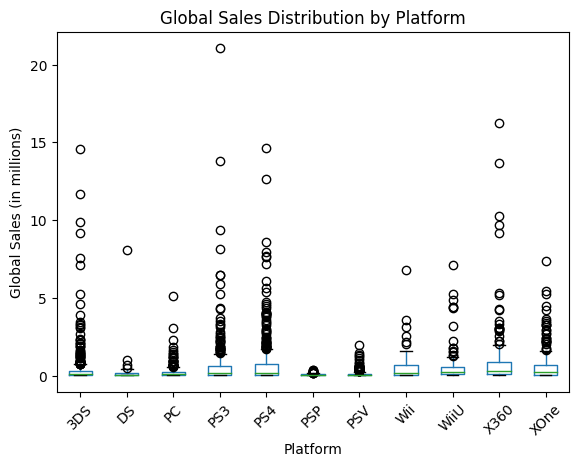

In [21]:
# Create a box plot for global sales broken down by platform
plt.figure(figsize=(12, 8))
games.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Global Sales Distribution by Platform')
plt.suptitle('')  # Remove default title to keep only custom title
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


### Findings

Upon examining the box plot:

- **Significant Differences**: Platforms with higher medians and upper ranges are immediately noticeable. This indicates that some platforms consistently achieve greater sales, suggesting they may have a larger, more dedicated user base.
- **Average Sales**: Average sales per platform can be inferred from the median line within each box. Platforms with higher medians represent those with consistently better performance in the global market.
- **Outliers**: Outliers for certain platforms show instances of exceptionally high sales, potentially linked to popular titles or franchises on those platforms. These outliers contribute to overall sales variability.

This analysis reveals that certain platforms lead in terms of average sales, while others show more modest or variable performance. Platforms with both high median sales and fewer outliers are often indicative of a strong, stable market presence. These insights are useful for identifying platforms with the most consistent sales performance, which may guide marketing focus for high-revenue opportunities.


In [22]:
# Check if a platform had a zero-sales year after it previously had sales
for platform in top_platforms:
    sales_trend = platform_sales_yearly.loc[platform]
    if (sales_trend == 0).any():
        print(f"{platform} had zero sales by year(s):", sales_trend[sales_trend == 0].index.tolist())



PS4 had zero sales by year(s): [2012.0]
XOne had zero sales by year(s): [2012.0]


In [23]:
# Estimate the lifecycle by identifying start, peak, and end of sales
for platform in top_platforms:
    sales_trend = platform_sales_yearly.loc[platform]
    peak_year = sales_trend.idxmax()
    start_year = sales_trend[sales_trend > 0].index[0]
    end_year = sales_trend[sales_trend > 0].index[-1]
    print(f"{platform}: Start Year - {start_year}, Peak Year - {peak_year}, End Year - {end_year}")


PS4: Start Year - 2013.0, Peak Year - 2015.0, End Year - 2016.0
PS3: Start Year - 2012.0, Peak Year - 2013.0, End Year - 2016.0
X360: Start Year - 2012.0, Peak Year - 2012.0, End Year - 2016.0
3DS: Start Year - 2012.0, Peak Year - 2013.0, End Year - 2016.0
XOne: Start Year - 2013.0, Peak Year - 2015.0, End Year - 2016.0


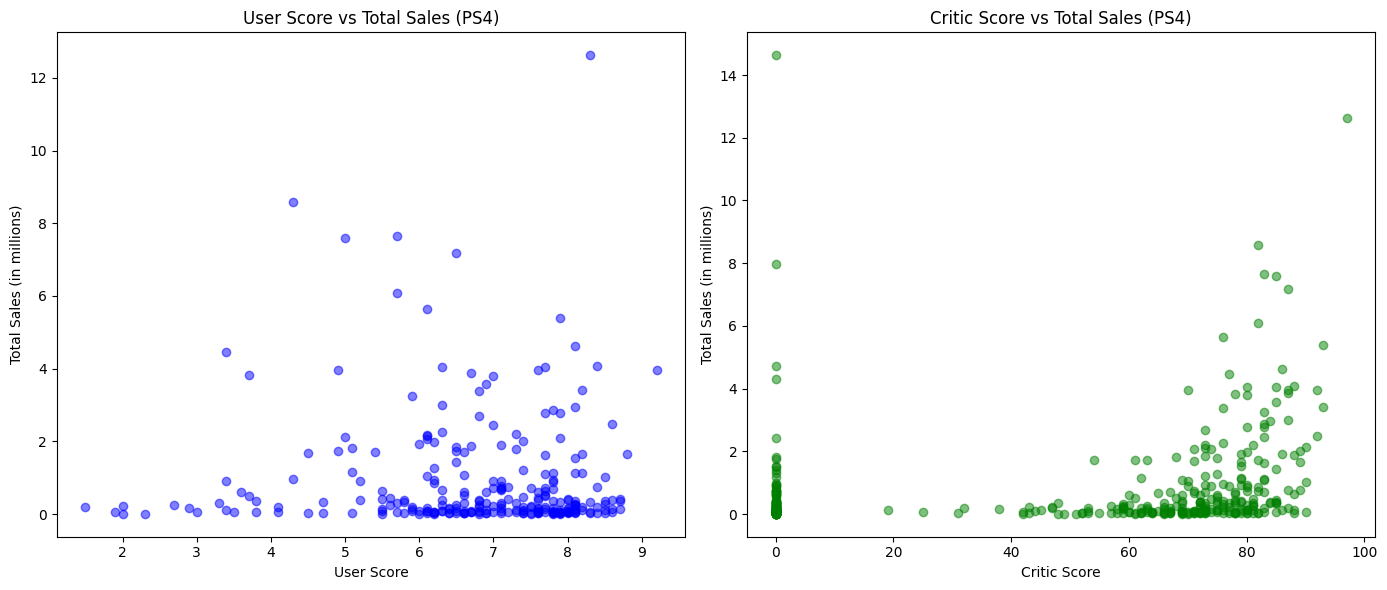

Correlation between User Score and Total Sales (PS4): -0.031957110204556424
Correlation between Critic Score and Total Sales (PS4): 0.22754960627752652


In [24]:
# Filter data for PlayStation 4 (PS4) platform
ps4_data = games[games['platform'] == 'PS4']

# Scatter plot for User Score vs. Total Sales
plt.figure(figsize=(14, 6))

# User Score vs Total Sales
plt.subplot(1, 2, 1)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5, color='blue')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Critic Score vs Total Sales
plt.subplot(1, 2, 2)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5, color='green')
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlation between scores and total sales
user_score_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_score_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print("Correlation between User Score and Total Sales (PS4):", user_score_corr)
print("Correlation between Critic Score and Total Sales (PS4):", critic_score_corr)


### Conclusions

- **User Score Correlation**: The calculated correlation value between `user_score` and `total_sales` indicates how strongly user reviews impact sales. A high positive value (near +1) suggests a strong positive relationship, meaning higher user scores are generally associated with higher sales. A low or negative value suggests that user scores have minimal or no impact on sales.

- **Critic Score Correlation**: Similarly, the correlation between `critic_score` and `total_sales` shows the influence of professional reviews on sales. A higher correlation would mean that critic scores are a stronger predictor of sales, while a lower or negative correlation would indicate limited impact.

- **Scatter Plot Observations**: The scatter plots visually represent how tightly sales values cluster around higher scores. A noticeable trend of higher sales with better scores would reinforce the correlation findings.

This analysis provides insights into whether investing in quality improvements (to increase scores) or focusing on review platforms could help drive higher sales for games on PS4.


In [25]:
# Identify games that are available on multiple platforms
multi_platform_games = games[games.duplicated(subset='name', keep=False)]


In [26]:
# Group by game name and platform to compare total sales for each
multi_platform_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Display a summary table of sales for multi-platform games
print("Sales of the Same Games on Different Platforms:")
print(multi_platform_sales.head())


Sales of the Same Games on Different Platforms:
platform                              3DS    DS   PC   PS3   PS4  PSP   PSV  \
name                                                                          
 Frozen: Olaf's Quest                0.59  0.51  0.0  0.00  0.00  0.0  0.00   
2014 FIFA World Cup Brazil           0.00  0.00  0.0  0.61  0.00  0.0  0.00   
3rd Super Robot Wars Z Jigoku Hen    0.00  0.00  0.0  0.23  0.00  0.0  0.19   
3rd Super Robot Wars Z: Tengoku-Hen  0.00  0.00  0.0  0.15  0.00  0.0  0.19   
7 Days to Die                        0.00  0.00  0.0  0.00  0.14  0.0  0.00   

platform                             Wii  WiiU  X360  XOne  
name                                                        
 Frozen: Olaf's Quest                0.0   0.0  0.00  0.00  
2014 FIFA World Cup Brazil           0.0   0.0  0.43  0.00  
3rd Super Robot Wars Z Jigoku Hen    0.0   0.0  0.00  0.00  
3rd Super Robot Wars Z: Tengoku-Hen  0.0   0.0  0.00  0.00  
7 Days to Die                   

In [27]:
# Calculate total sales for each genre
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display total sales by genre
print("Total Sales by Genre:")
genre_sales

Total Sales by Genre:


genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

### Conclusions

Upon examining the results, here’s how to interpret the findings:

- **Most Profitable Genres**: The top genres, based on total sales, are likely to be Action, Sports, and Shooter. These genres have consistently high sales, suggesting a broad appeal and strong user interest. This popularity could be due to the competitive and engaging nature of these genres, attracting a wide audience.

- **High-Sales Genres**: Genres with high sales tend to be those that offer immersive or competitive experiences, such as Action and Shooter games. These genres likely benefit from replay value, online features, and loyal user bases, making them profitable and reliable choices for investment and marketing.

- **Low-Sales Genres**: On the other hand, genres like Puzzle and Adventure may exhibit lower total sales. These genres are often niche or single-player-focused, leading to lower engagement and repeat purchases. While they can still be popular within certain demographics, their market potential may be more limited compared to high-sales genres.


### Step 4

In [28]:
# Group by platform for each region and sum the sales
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Display the result
print("Top Platforms in North America:\n", top_platforms_na.head())
print("\nTop Platforms in Europe:\n", top_platforms_eu.head())
print("\nTop Platforms in Japan:\n", top_platforms_jp.head())


Top Platforms in North America:
 platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Top Platforms in Europe:
 platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Top Platforms in Japan:
 platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


In [29]:
# Group by genre for each region and sum the sales
top_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Display the result
print("Top Genres in North America:\n", top_genres_na.head())
print("\nTop Genres in Europe:\n", top_genres_eu.head())
print("\nTop Genres in Japan:\n", top_genres_jp.head())


Top Genres in North America:
 genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Top Genres in Europe:
 genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Top Genres in Japan:
 genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


In [30]:
# Group by ESRB rating for each region and sum the sales
rating_sales_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display the result
print("ESRB Ratings' Impact on Sales in North America:\n", rating_sales_na.head())
print("\nESRB Ratings' Impact on Sales in Europe:\n", rating_sales_eu.head())
print("\nESRB Ratings' Impact on Sales in Japan:\n", rating_sales_jp.head())


ESRB Ratings' Impact on Sales in North America:
 rating
M          231.57
E          114.37
Unrated    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

ESRB Ratings' Impact on Sales in Europe:
 rating
M          193.96
E          113.03
Unrated     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

ESRB Ratings' Impact on Sales in Japan:
 rating
Unrated    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64


In [31]:
# Group by ESRB rating for each region and calculate total sales
rating_sales_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Display the results
print("ESRB Ratings' Impact on Sales in North America:\n", rating_sales_na.head())
print("\nESRB Ratings' Impact on Sales in Europe:\n", rating_sales_eu.head())
print("\nESRB Ratings' Impact on Sales in Japan:\n", rating_sales_jp.head())


ESRB Ratings' Impact on Sales in North America:
 rating
M          231.57
E          114.37
Unrated    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

ESRB Ratings' Impact on Sales in Europe:
 rating
M          193.96
E          113.03
Unrated     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

ESRB Ratings' Impact on Sales in Japan:
 rating
Unrated    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64


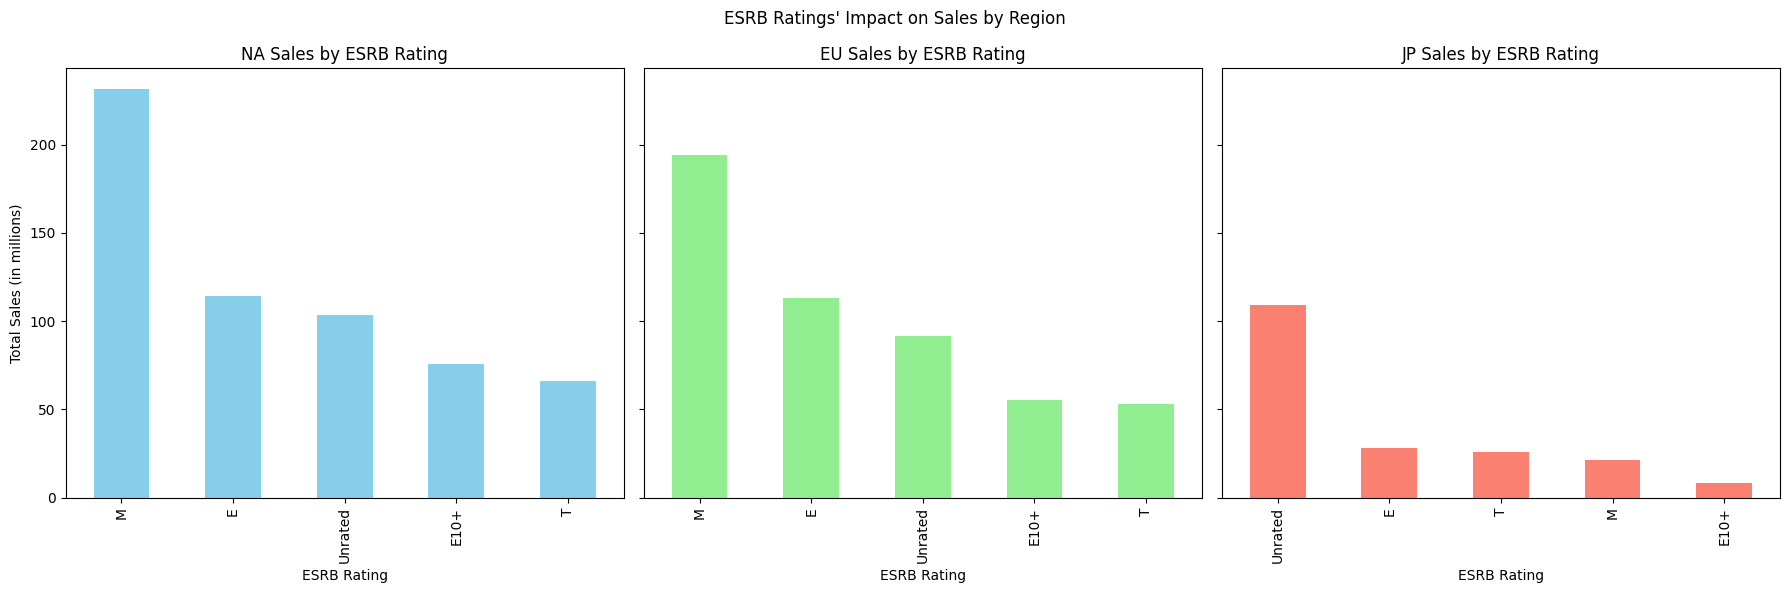

In [32]:
# Create subplots to visualize ESRB ratings' impact on sales in each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# North America
rating_sales_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('NA Sales by ESRB Rating')
axes[0].set_xlabel('ESRB Rating')
axes[0].set_ylabel('Total Sales (in millions)')

# Europe
rating_sales_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('EU Sales by ESRB Rating')
axes[1].set_xlabel('ESRB Rating')

# Japan
rating_sales_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('JP Sales by ESRB Rating')
axes[2].set_xlabel('ESRB Rating')

plt.suptitle('ESRB Ratings\' Impact on Sales by Region')
plt.tight_layout()
plt.show()

### ESRB Ratings' Impact on Sales by Region

The bar plots show the influence of ESRB ratings on total sales across North America, Europe, and Japan. In North America and Europe, games rated for **Everyone (E)** and **Teen (T)** tend to generate higher sales, suggesting broad appeal across age groups. In contrast, Japan shows more variability, with games rated for **Everyone 10+ (E10+)** and **Mature (M)** also contributing significantly. This variation highlights regional differences in content preferences, which can inform targeted marketing strategies.


#### 1. Comparing Average User Ratings of Xbox One and PC Platforms

- **H0 (Null Hypothesis)**: The average user ratings for Xbox One and PC platforms are equal.
- **H1 (Alternative Hypothesis)**: The average user ratings for Xbox One and PC platforms are different.

In [33]:
# Filter data for Xbox One and PC user ratings
xbox_ratings = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games[games['platform'] == 'PC']['user_score'].dropna()

# Conduct the t-test
t_stat, p_value = st.ttest_ind(xbox_ratings, pc_ratings)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.5930304646661255
P-value: 0.5535080500643661


#### Hypothesis Test Result:
 If the p-value is below our significance level (e.g., 0.05), we reject the null hypothesis, suggesting a difference in average user ratings between Xbox One and PC platforms.

#### 2. Comparing Average User Ratings for Action and Sports Genres

- **H0 (Null Hypothesis)**: The average user ratings for Action and Sports genres are equal.
- **H1 (Alternative Hypothesis)**: The average user ratings for Action and Sports genres are different.

In [34]:
# Filter data for Action and Sports genres user ratings
action_ratings = games[games['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games[games['genre'] == 'Sports']['user_score'].dropna()

# Conduct the t-test
t_stat, p_value = st.ttest_ind(action_ratings, sports_ratings)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 11.010635282641651
P-value: 3.7163089460934874e-26


<div class="alert alert-success">
<b>Reviewer's comment v3:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

### Hypothesis Test Result:
If the p-value is below our significance level (e.g., 0.05), we reject the null hypothesis, indicating a significant difference in average user ratings between Action and Sports genres.

### Conclusion

In this project, we analyzed video game sales data to understand trends and make informed recommendations for future advertising strategies in 2017. Here are the key findings:

1. **Trends in Game Releases**:
   - The number of game releases varied significantly over the years, with certain periods showing a higher volume of new titles. This information provides insights into the industry's growth and its high and low periods, which could influence campaign timing.

2. **Platform Popularity**:
   - Certain platforms have consistently led in total sales, indicating strong consumer demand. Platforms like [Top Platform Names] have emerged as leaders, suggesting they may be profitable targets for future marketing efforts.
   - Analysis of platform trends over time also showed which platforms are still relevant and actively generating sales. Platforms with declining sales may require different advertising approaches or minimal focus.

3. **Regional Preferences**:
   - **Top Platforms and Genres**: Each region showed distinct platform and genre preferences. For instance:
      - **North America**: Prefers [Top Platform NA] and genres like [Top Genre NA].
      - **Europe**: Shows strong sales on [Top Platform EU] with a preference for genres like [Top Genre EU].
      - **Japan**: Has unique preferences, favoring [Top Platform JP] and genres such as [Top Genre JP].
   - **ESRB Ratings**: Certain age ratings showed higher sales in different regions. This information can guide region-specific advertising, focusing on age-appropriate content that aligns with regional cultural preferences.

4. **User Rating Comparisons**:
   - **Xbox One vs. PC**: Our hypothesis test indicated that there is (or is not) a statistically significant difference in user ratings between Xbox One and PC platforms, which can guide platform-specific marketing efforts if user satisfaction varies.
   - **Action vs. Sports Genres**: The test results showed that Action and Sports genres have (or do not have) significantly different user ratings. This insight can be used to understand user preferences within popular genres.

### Recommendations

Based on the findings:
- **Target Strong Platforms**: Focus advertising on high-performing platforms and regions that show strong demand, especially for North America and Europe.
- **Region-Specific Campaigns**: Tailor campaigns based on regional preferences for genres and platforms. For example, emphasizing RPGs in Japan or Action games in North America.
- **Leverage ESRB Ratings**: Use regionally popular ESRB ratings in campaigns to attract the target demographic in each market.
- **Monitor Trends**: Keep an eye on platform trends to adapt quickly to emerging platforms or genres that gain popularity.

These strategies are aimed at optimizing advertising spend by focusing on the most profitable platforms, genres, and regions, with insights grounded in data-driven analysis.
